In [1]:
import pandas as pd
import time
import random
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from ray.tune.function_runner import StatusReporter
import tensorflow_addons as tfa
from tensorflow.python.keras.optimizers import Adam, sgd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
import kr_helper_funcs as kr
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
pwd

'C:\\Users\\dan39\\OneDrive\\Desktop\\Dissertation\\Code\\dissertation\\MouseProtein'

In [3]:
df = pd.read_excel('data_mice.xls', index_col=1)
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [4]:
df = df.dropna()
df.count()

MouseID            552
ITSN1_N            552
BDNF_N             552
NR1_N              552
NR2A_N             552
pAKT_N             552
pBRAF_N            552
pCAMKII_N          552
pCREB_N            552
pELK_N             552
pERK_N             552
pJNK_N             552
PKCA_N             552
pMEK_N             552
pNR1_N             552
pNR2A_N            552
pNR2B_N            552
pPKCAB_N           552
pRSK_N             552
AKT_N              552
BRAF_N             552
CAMKII_N           552
CREB_N             552
ELK_N              552
ERK_N              552
GSK3B_N            552
JNK_N              552
MEK_N              552
TRKA_N             552
RSK_N              552
APP_N              552
Bcatenin_N         552
SOD1_N             552
MTOR_N             552
P38_N              552
pMTOR_N            552
DSCR1_N            552
AMPKA_N            552
NR2B_N             552
pNUMB_N            552
RAPTOR_N           552
TIAM1_N            552
pP70S6_N           552
NUMB_N     

In [5]:
df = df.drop(['MouseID', 'BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'pCFOS_N'],axis=1)
df.columns

Index(['ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [6]:
df = df.dropna()
df.count()

ITSN1_N            552
BDNF_N             552
NR1_N              552
NR2A_N             552
pAKT_N             552
pBRAF_N            552
pCAMKII_N          552
pCREB_N            552
pELK_N             552
pERK_N             552
pJNK_N             552
PKCA_N             552
pMEK_N             552
pNR1_N             552
pNR2A_N            552
pNR2B_N            552
pPKCAB_N           552
pRSK_N             552
AKT_N              552
BRAF_N             552
CAMKII_N           552
CREB_N             552
ELK_N              552
ERK_N              552
GSK3B_N            552
JNK_N              552
MEK_N              552
TRKA_N             552
RSK_N              552
APP_N              552
Bcatenin_N         552
SOD1_N             552
MTOR_N             552
P38_N              552
pMTOR_N            552
DSCR1_N            552
AMPKA_N            552
NR2B_N             552
pNUMB_N            552
RAPTOR_N           552
TIAM1_N            552
pP70S6_N           552
NUMB_N             552
P70S6_N    

<Figure size 864x288 with 0 Axes>

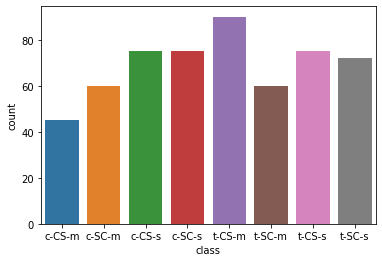

<Figure size 864x288 with 0 Axes>

In [7]:
sns.countplot(x='class',data=df)
plt.figure(figsize=(12,4))

In [8]:
# plt.figure(figsize=(120,90))
# sns.heatmap(df.corr(),annot=True,cmap='viridis')
# plt.ylim(110, 0)

In [9]:
# dummies = pd.get_dummies(df[],drop_first=True)
# df = df.drop(['Genotype', 'Treatment', 'Behavior'],axis=1)
# df = pd.concat([df,dummies],axis=1)

df = df.drop(['Genotype', 'Treatment', 'Behavior'],axis=1)

# df = pd.get_dummies(df, columns=['Genotype', 'Treatment', 'Behavior'], drop_first=True)
               
df['class'] = df['class'].map({'c-CS-m':0,'c-CS-s':1, 'c-SC-m':2,'c-SC-s':3, 't-CS-m':4,'t-CS-s':5, 't-SC-m':6,'t-SC-s':7})
               
df.head()

,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,class
DYRK1A_N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,0.969466,0.321260,0.406562,0.255293,1.056343,1.099300,1.925284,2.231671,0.426859,0.873228,0.512773,0.343220,0.167629,1.852756,3.366492,1.503675,0.246019,0.305424,0.851006,0.165179,0.441557,2.578215,0.340857,0.487664,0.401050,0.781365,0.534033,0.431846,0.618023,0.361417,0.321960,0.427297,0.252056,0.242086,1.061181,0.163758,1.862368,0.321175,0.541041,2.159547,0.134639,0.158178,0.196124,0.132001,0.161120,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.687551,2.436587,0.168172,1.139154,0.987774,0.239752,0.132001,0.486912,1.627181,0
0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,0.991845,0.342918,0.396910,0.270815,1.032790,1.078712,1.893047,2.330987,0.409185,0.789013,0.511502,0.344807,0.166695,1.852532,3.431159,1.471674,0.242060,0.300172,0.833648,0.162661,0.437253,2.538026,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,0.603176,0.360258,0.296052,0.425837,0.252017,0.242120,1.063985,0.169981,1.692204,0.320473,0.539226,2.167098,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.662872,2.354728,0.174704,1.227851,0.981655,0.249031,0.139008,0.467833,1.562096,0
0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,0.989999,0.328976,0.397930,0.263795,1.092289,1.094043,1.915958,1.952540,0.454075,0.793754,0.533205,0.352048,0.172559,1.965786,3.434249,1.541802,0.251952,0.345908,0.881393,0.165278,0.443460,2.609615,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,0.640232,0.374331,0.299675,0.445214,0.252303,0.241042,1.059453,0.175230,1.654840,0.317856,0.561875,2.182447,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.204300,0.129555,0.270062,0.153629,0.506309,0.349753,1.716362,2.437317,0.156001,1.226103,0.994146,0.247956,0.134804,0.462501,1.571868,0
0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.755842,2.297212,0.484818,0.742183,0.459194,0.337510,0.161982,1.364714,2.814990,1.440795,0.234902,0.274975,0.766452,0.150581,0.407608,2.311999,0.312112,0.466305,0.394740,0.740603,0.522971,0.391918,0.585055,0.345186,0.286714,0.399932,0.277458,0.208718,0.969007,0.153779,2.027937,0.299825,0.466762,1.795148,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.316600,1.586368,2.382140,0.145049,1.056498,0.970067,0.233225,0.118982,0.479110,1.646608,0
0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,0.815057,0.315001,0.391525,0.254142,0.955370,0.938465,1.744844,2.477854,0.476502,0.715880,0.486307,0.338668,0.160600,1.398174,2.891018,1.469402,0.234870,0.270033,0.755438,0.149555,0.411360,2.320861,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,0.587400,0.346557,0.290319,0.405838,0.354671,0.212714,0.972906,0.163062,1.969799,0.303008,0.491797,1.763485,0.124348,0.153741,0.188106,0.128635,0.167972,0.196992,0.197117,0.128635,0.283371,0.137211,0.542568,0.340355,1.619190,2.386217,0.150945,1.132737,0.980798,0.244469,0.128635,0.438354,1.607631,0


In [10]:
df.count()

ITSN1_N            552
BDNF_N             552
NR1_N              552
NR2A_N             552
pAKT_N             552
pBRAF_N            552
pCAMKII_N          552
pCREB_N            552
pELK_N             552
pERK_N             552
pJNK_N             552
PKCA_N             552
pMEK_N             552
pNR1_N             552
pNR2A_N            552
pNR2B_N            552
pPKCAB_N           552
pRSK_N             552
AKT_N              552
BRAF_N             552
CAMKII_N           552
CREB_N             552
ELK_N              552
ERK_N              552
GSK3B_N            552
JNK_N              552
MEK_N              552
TRKA_N             552
RSK_N              552
APP_N              552
Bcatenin_N         552
SOD1_N             552
MTOR_N             552
P38_N              552
pMTOR_N            552
DSCR1_N            552
AMPKA_N            552
NR2B_N             552
pNUMB_N            552
RAPTOR_N           552
TIAM1_N            552
pP70S6_N           552
NUMB_N             552
P70S6_N    

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('class',axis=1).values
y = df['class'].values



441

In [12]:
# to_categorical(y_train)

In [29]:
X_train_unscaled, X_test_unscaled, y_train_o, y_test_o = train_test_split(X, y, test_size=0.20, random_state=101)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)


y_train = to_categorical(y_train_o, 8)
y_test = to_categorical(y_test_o, 8)

# rus = RandomUnderSampler()
# X_train, y_train = rus.fit_sample(X_train, y_train)

model = Sequential()
model.add(Dense(512,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8,activation='softmax'))

# optimizer =tfa.optimizers.RectifiedAdam(lr=1e-3)
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)

model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics =['accuracy'])

# class_weight= {0:1, 1:1}
# with_weigths=True
# if (with_weigths):
#     neg, pos = np.bincount(y_train)
#     total = neg + pos
#     print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
#     total, pos, 100 * pos / total))
#     weight_for_0 = (1 / neg)*(total)/2.0
#     weight_for_1 = (1 / pos)*(total)/2.0
#     class_weight = {0: weight_for_0, 1: weight_for_1}
#     print('Weight for class 0: {:.2f}'.format(weight_for_0))
#     print('Weight for class 1: {:.2f}'.format(weight_for_1))

early_stop = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(x=X_train,
          y=y_train,
          epochs=70,
#           class_weight=class_weight,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[EarlyStopping(monitor="accuracy", mode='max', patience=7, restore_best_weights=True)]
          )


Epoch 1/70
2/2 [==============================] - 0s 113ms/step - loss: 2.0901 - accuracy: 0.1247 - val_loss: 2.0621 - val_accuracy: 0.2883
Epoch 2/70
2/2 [==============================] - 0s 37ms/step - loss: 2.0668 - accuracy: 0.1542 - val_loss: 2.0495 - val_accuracy: 0.2252
Epoch 3/70
2/2 [==============================] - 0s 40ms/step - loss: 2.0622 - accuracy: 0.1723 - val_loss: 2.0299 - val_accuracy: 0.2342
Epoch 4/70
2/2 [==============================] - 0s 44ms/step - loss: 2.0318 - accuracy: 0.1927 - val_loss: 1.9990 - val_accuracy: 0.3694
Epoch 5/70
2/2 [==============================] - 0s 48ms/step - loss: 2.0211 - accuracy: 0.1927 - val_loss: 1.9635 - val_accuracy: 0.4144
Epoch 6/70
2/2 [==============================] - 0s 50ms/step - loss: 1.9926 - accuracy: 0.2018 - val_loss: 1.9118 - val_accuracy: 0.4144
Epoch 7/70
2/2 [==============================] - 0s 46ms/step - loss: 1.9911 - accuracy: 0.1814 - val_loss: 1.8634 - val_accuracy: 0.3153
Epoch 8/70
2/2 [==========

4/4 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9820
[0.08581268787384033, 0.9819819927215576]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
[2.0901074409484863, 2.066789150238037, 2.0621769428253174, 2.031752347946167, 2.021130084991455, 1.9926292896270752, 1.9911257028579712, 1.9116184711456299, 1.8918551206588745, 1.8354448080062866, 1.8252673149108887, 1.8052361011505127, 1.7365522384643555, 1.6785709857940674, 1.6858901977539062, 1.6023026704788208, 1.550890564918518, 1.5742522478103638, 1.5037301778793335, 1.4643025398254395, 1.4096012115478516, 1.3744654655456543, 1.3029499053955078, 1.2227050065994263, 1.1870943307876587, 1.2290279865264893, 1.1228066682815552, 1.1618850231170654, 1.1086843013763428, 1.0223418474197388, 0.97

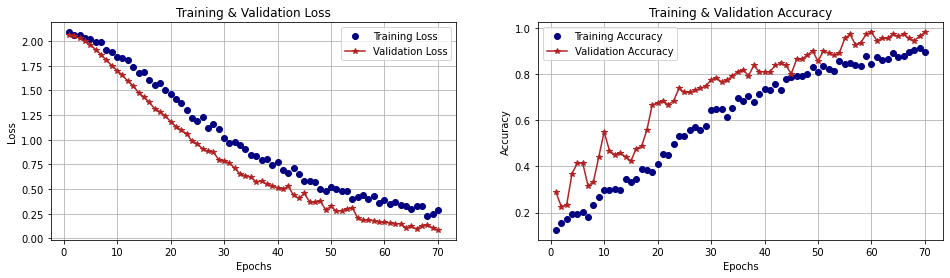

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        14
           4       0.91      1.00      0.95        21
           5       1.00      0.83      0.91        12
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        14

    accuracy                           0.98       111
   macro avg       0.99      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111

[[12  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  0  0  0  2 10  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0 14]]


In [30]:
results = model.evaluate(X_test, y_test)
print(results)

import kr_helper_funcs as kr
from sklearn.metrics import classification_report,confusion_matrix
kr.show_plots(history.history)

predictions = model.predict_classes(X_test)
print(classification_report(y_test_o, predictions))
print(confusion_matrix(y_test_o, predictions))

plt.show()

In [15]:
model.predict_classes(X_test[0].reshape(1,X_test.shape[1]))

array([4], dtype=int64)

In [33]:
df.columns

Index(['ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N',
       'class'],
      dtype='object')

In [17]:
import shap
explainer_shap = shap.KernelExplainer(model.predict, X_train)
global_shap_values = explainer_shap.shap_values(X_test)

Using 441 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


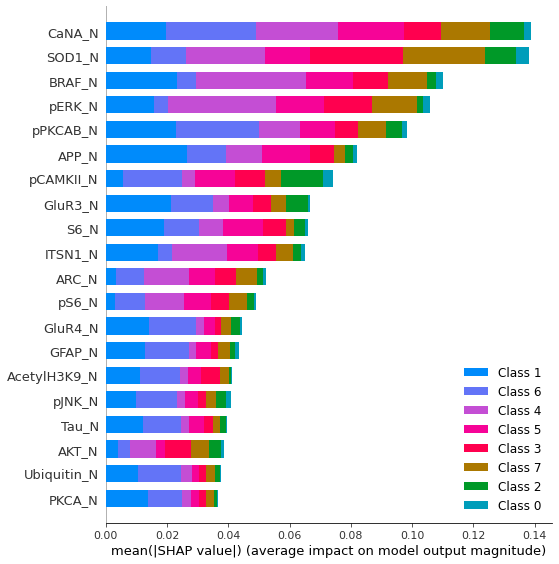

In [37]:
shap.summary_plot(global_shap_values, X_test, plot_type="bar", feature_names=list(df.drop('class', axis=1).columns))

In [34]:
help(shap.summary_plot)

Help on function summary_plot in module shap.plots.summary:

summary_plot(shap_values, features=None, feature_names=None, max_display=None, plot_type=None, color=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20, class_names=None, class_inds=None, color_bar_label='Feature value', auto_size_plot=None)
    Create a SHAP summary plot, colored by feature values when they are provided.
    
    Parameters
    ----------
    shap_values : numpy.array
        For single output explanations this is a matrix of SHAP values (# samples x # features).
        For multi-output explanations this is a list of such matrices of SHAP values.
    
    features : numpy.array or pandas.DataFrame or list
        Matrix of feature values (# samples x # features) or a feature_names list as shorthand
    
    feature_names : list
        Names of the features (length # features)
    
    max_display : int
        How many top

In [41]:
# from threading import Lock
# lock = Lock()
import os
def save_model(name = 'mouse', model = model):
    # lock.aquire()
    # try:
    import tensorflow as tf
    if not os.path.exists(name):
        os.mkdir(name)
    tf.keras.models.save_model(model, '{}/{}.h5'.format(name, name))
    pd.DataFrame.from_dict(history.history).to_csv("{}/{}-history.csv".format(name, name), index=False)
    np.save("{}/X_train_unscaled.npy".format(name), X_train_unscaled)
    np.save("{}/X_test_unscaled.npy".format(name), X_test_unscaled)
    np.save("{}/y_train.npy".format(name), y_train_o)
    np.save("{}/y_test.npy".format(name), y_test_o)
    df.to_csv("{}/{}-df.csv".format(name,name), index=False)
    # finally:
    #     lock.release()
# save_model()